In [1]:
import h5py
import numpy as  np
from pathlib import Path
from matplotlib.colors import LogNorm
from matplotlib.ticker import FormatStrFormatter
import math

Stanie na 2m

In [2]:
BASE_DIR = Path("D:/Studia/sium/semestr3/radar-project/data")  # change to your project dir

loaded_file = h5py.File(BASE_DIR/'dataset.h5','r')
frames = loaded_file['13']['dataset_13']

In [3]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,5)
from source.preprocessHighFPS import _chunk_to_fft

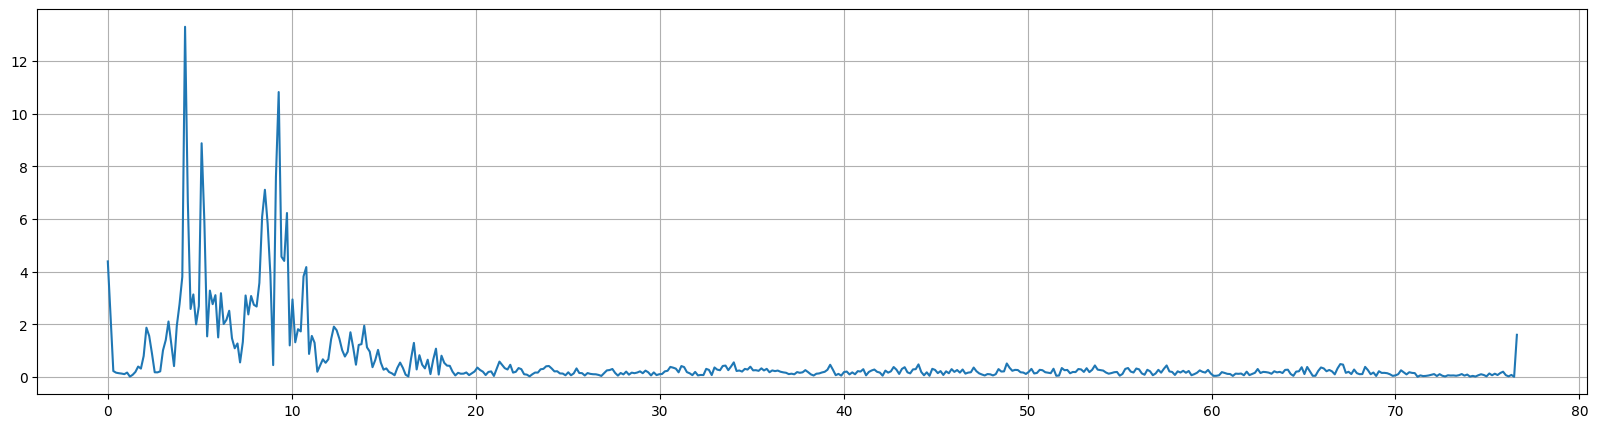

In [4]:

N = 512 * 2 # *2 żeby później usunąć negatywne wartości i nadal mieć 512 wartości
T = 1/2924 # Sample Rate(ksps)
yf = frames[1,0,0,:]
yf = _chunk_to_fft(yf)

xf = np.fft.fftfreq(N, d=T)[:N//2]
scale = 1/0.05249386419 # z frequnecy slope
xf_scaled = np.round(xf / scale,2)


plt.plot(xf_scaled, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
# plt.xlim(0,10)
plt.show()

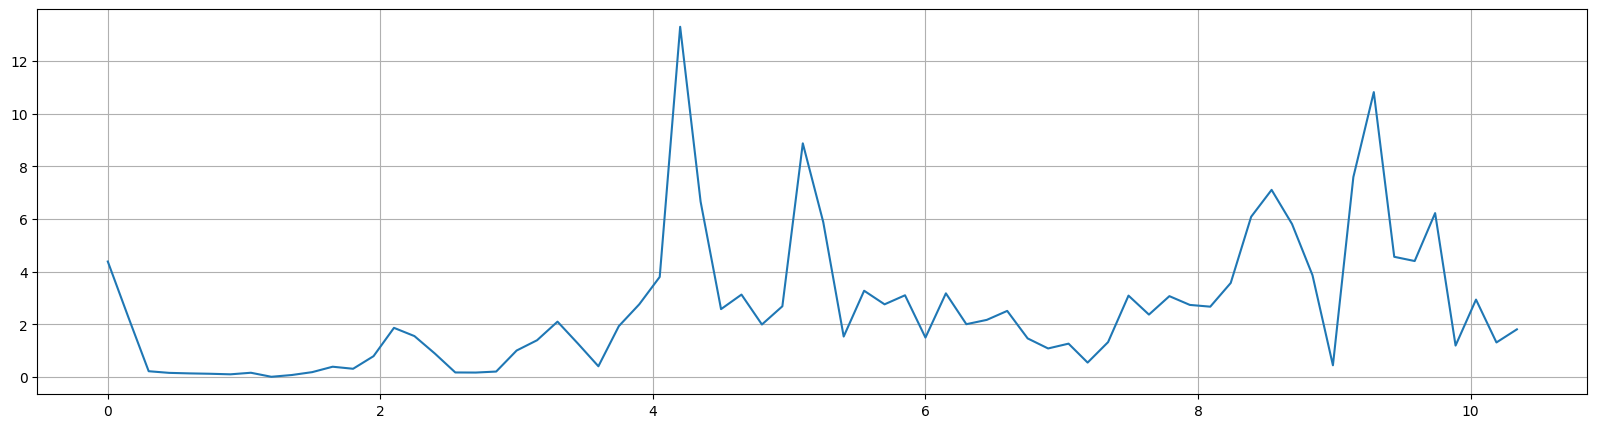

In [5]:
plt.plot(xf_scaled[0:70], 2/N * np.abs(yf[0:N//2])[0:70])
plt.grid()

plt.show()

In [6]:
stanie = []
stanie_phase = []
for i in range(14*25):
    id = i*25
    yf = frames[id,0,0,:]
    yf = _chunk_to_fft(yf)
    stanie.append(2.0/N * np.abs(yf.real[0:N//2])[:70])
    stanie_phase.append(2.0/N * np.abs(yf.imag[0:N//2])[:70])


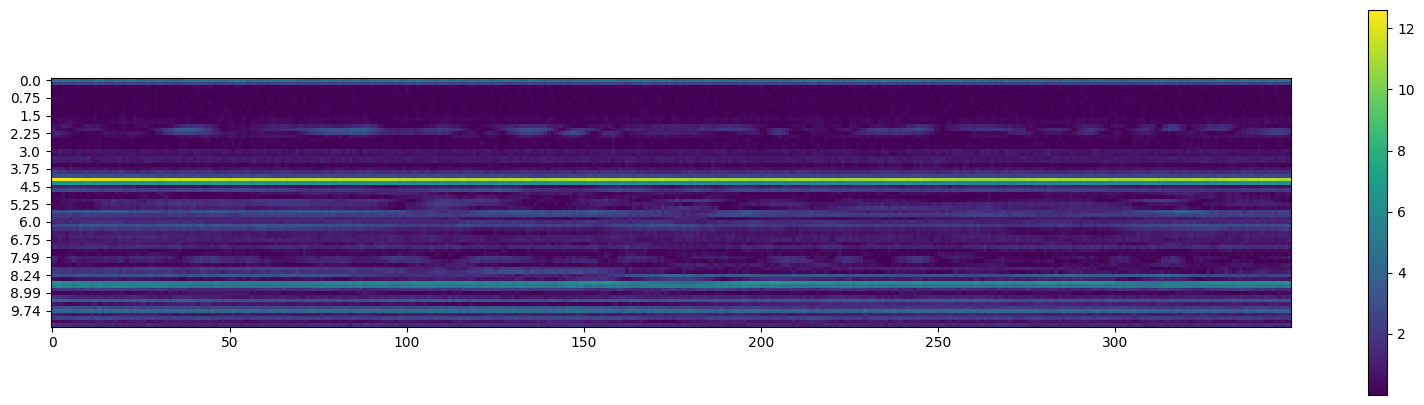

In [7]:
stanie =np.array(stanie)
plt.imshow(stanie.T)
plt.yticks(np.arange(start=0,stop=70,step=5),xf_scaled[:70][::5])
plt.colorbar()
plt.show()

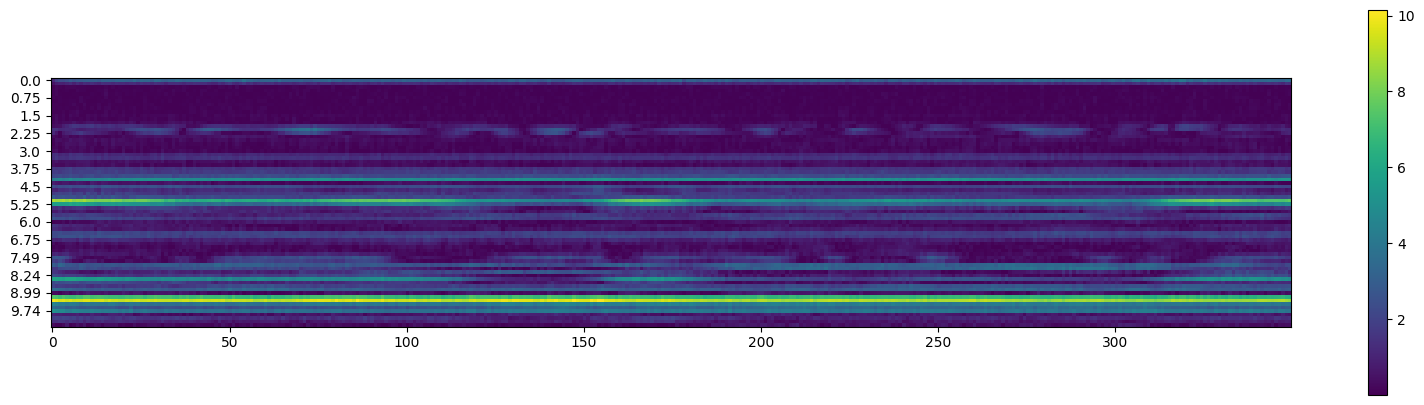

In [8]:
stanie_phase =np.array(stanie_phase)
plt.imshow(stanie_phase.T)
plt.yticks(np.arange(start=0,stop=70,step=5),xf_scaled[:70][::5])
plt.colorbar()
plt.show()

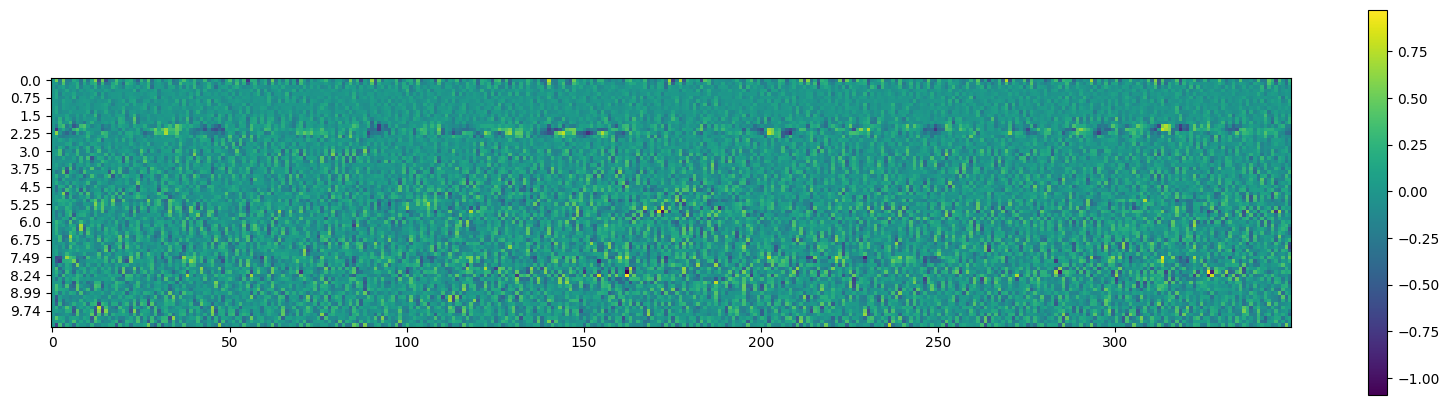

In [9]:
stanie_diff = []
for i,f in enumerate(stanie):
    if i == 0:
        stanie_diff.append(f-f)
    else:
        stanie_diff.append(f-stanie[i-1])
stanie_diff = np.array(stanie_diff)
# stanie_diff = np.abs(stanie_diff)
plt.imshow(stanie_diff.T)
plt.yticks(np.arange(start=0, stop=70, step=5), xf_scaled[:70][::5])
plt.colorbar()
plt.show()

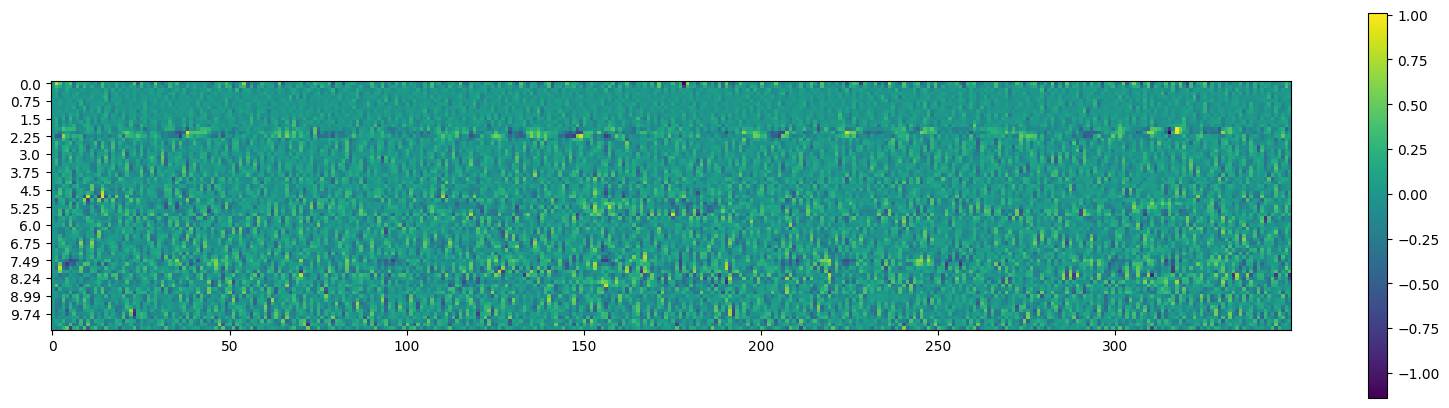

In [10]:
stanie_diff_p = []
for i,f in enumerate(stanie_phase):
    if i == 0:
        stanie_diff_p.append(f-f)
    else:
        stanie_diff_p.append(f-stanie_phase[i-1])
stanie_diff_p = np.array(stanie_diff_p)
# stanie_diff = np.abs(stanie_diff)
plt.imshow(stanie_diff_p.T)
plt.yticks(np.arange(start=0, stop=70, step=5), xf_scaled[:70][::5])
plt.colorbar()
plt.show()

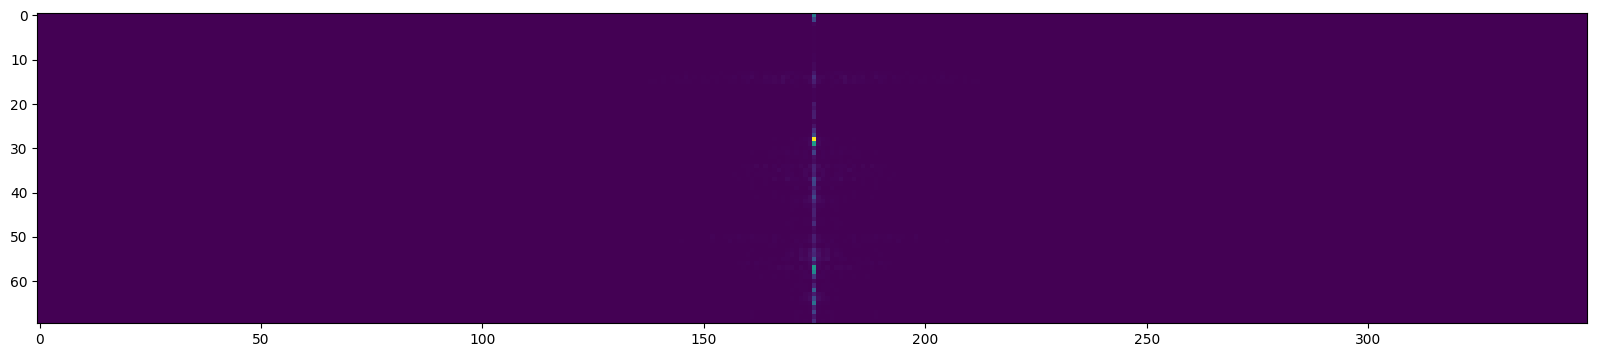

In [11]:
range_doppler = np.fft.fft(stanie, axis=0)
range_doppler = np.fft.fftshift(range_doppler, axes=0)
plt.imshow(np.abs(range_doppler).T)

In [12]:
def to_dB(arr: np.ndarray) -> list:
    arr = arr + 0.0000001
    return [10 * math.log10(a) for a in arr]

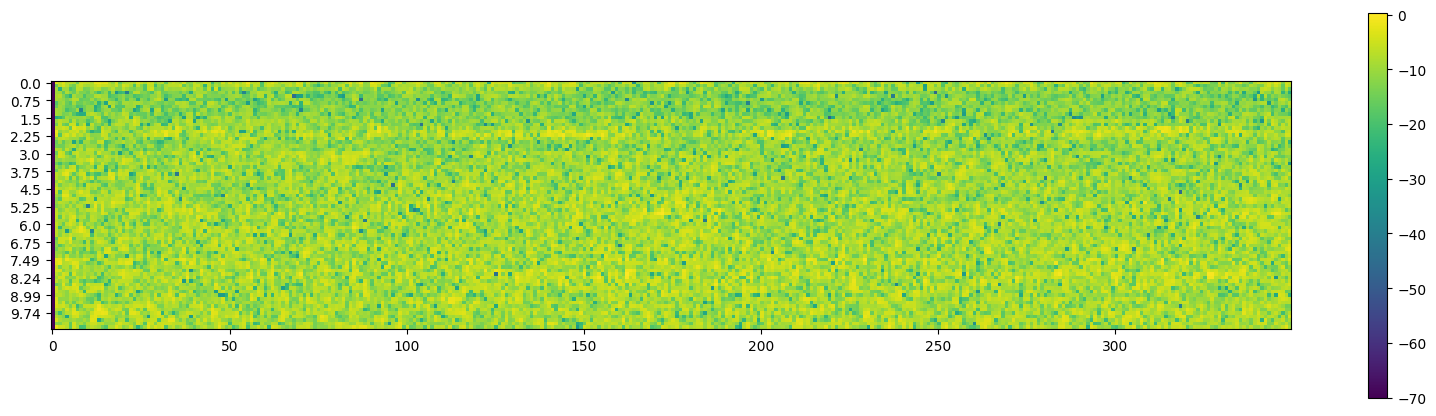

In [13]:
stanie_diff_db = []
for i,f in enumerate(stanie_diff):
    stanie_diff_db.append(to_dB(abs(f)))

stanie_diff_db = np.array(stanie_diff_db)
plt.imshow(stanie_diff_db.T)
plt.yticks(np.arange(start=0, stop=70, step=5), xf_scaled[:70][::5])
plt.colorbar()
plt.show()

Losowe chodzenie

In [14]:
frames = loaded_file['8']['dataset_8']

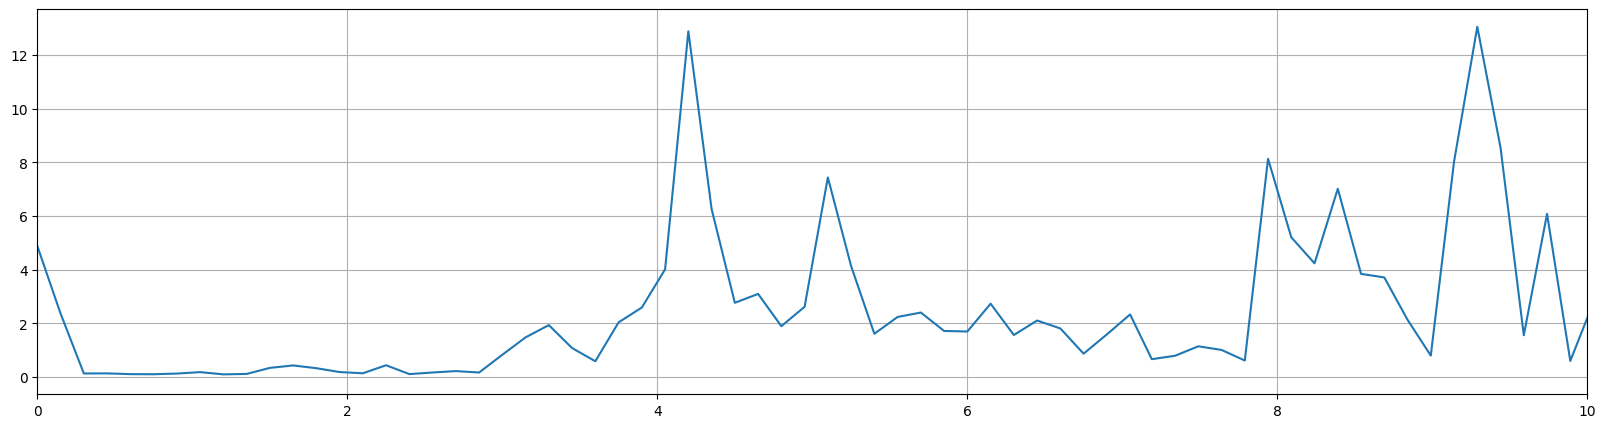

In [15]:
# Number of sample points
N = 512 * 2
# sample spacing
T = 1/2924
yf = frames[200,0,0,:]
yf = _chunk_to_fft(yf)

xf = np.fft.fftfreq(N, d=T)[:N//2]
scale = 1/0.05249386419
xf_scaled = np.round(xf / scale, 2)


plt.plot(xf_scaled, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.xlim(0,10)
plt.show()

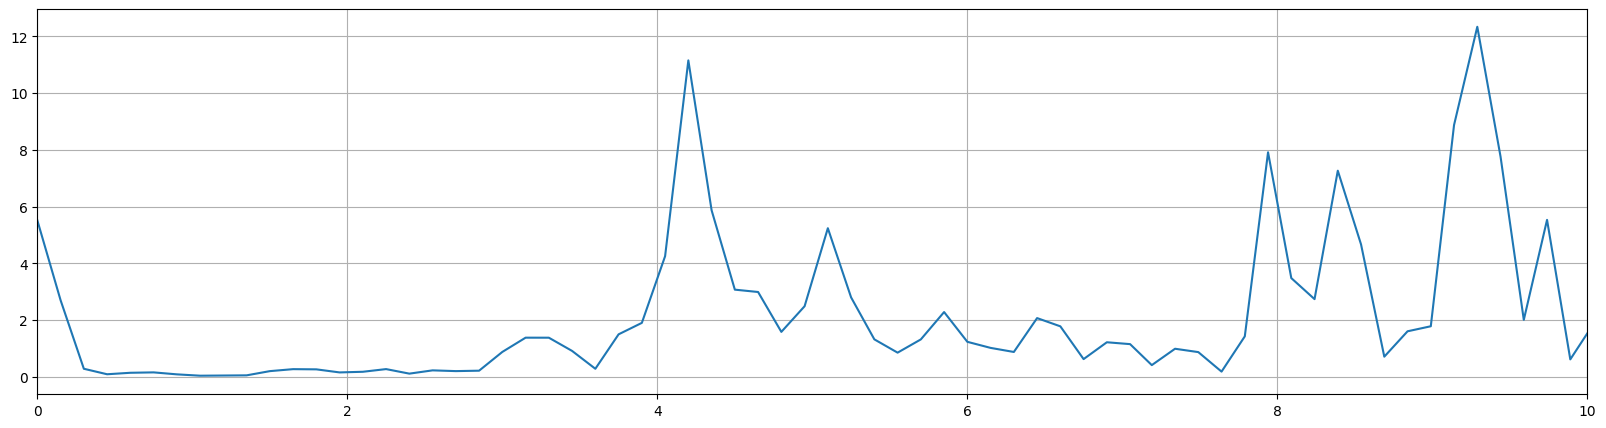

In [16]:
# Number of sample points
N = 512 * 2
# sample spacing
T = 1/2924
yf = frames[4000,0,0,:]
yf = _chunk_to_fft(yf)

xf = np.fft.fftfreq(N, d=T)[:N//2]
scale = 1/0.05249386419 # długość fali dla częstotliwości 5.711GHz
xf_scaled = np.round(xf / scale,2)


plt.plot(xf_scaled, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.xlim(0,10)
plt.show()

In [17]:
lst = []
for i in range(540):
    id = i*30
    yf = frames[id,0,0,:]
    yf = _chunk_to_fft(yf)
    lst.append(2.0/N * np.abs(yf[0:N//2])[:70])


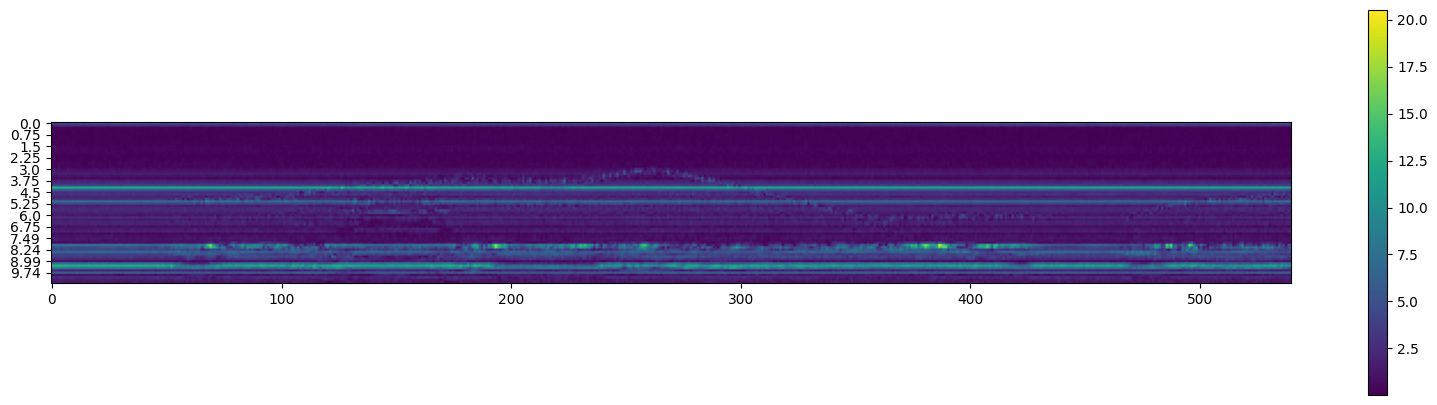

In [18]:
lst =np.array(lst)
plt.imshow(lst.T)
plt.yticks(np.arange(start=0,stop=70,step=5), xf_scaled[:70][::5])
plt.colorbar()
plt.show()

In [19]:
chodzenie = np.zeros_like(lst)
for i, frame in enumerate(lst):
    if i != 0:
        chodzenie[i] = frame - lst[i-1]

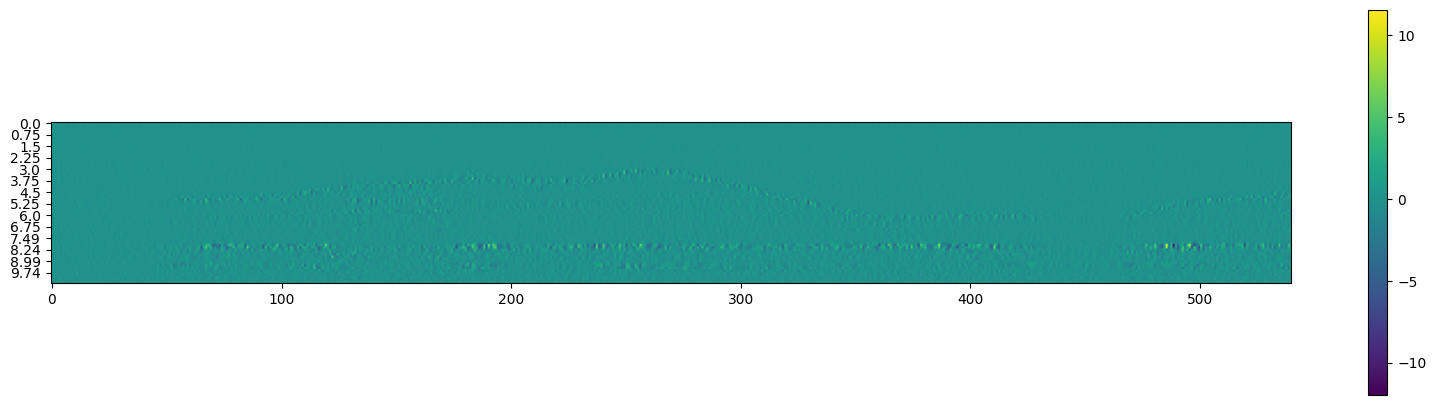

In [20]:
plt.imshow(chodzenie.T)
plt.yticks(np.arange(start=0,stop=70,step=5), xf_scaled[:70][::5])
plt.colorbar()
plt.show()

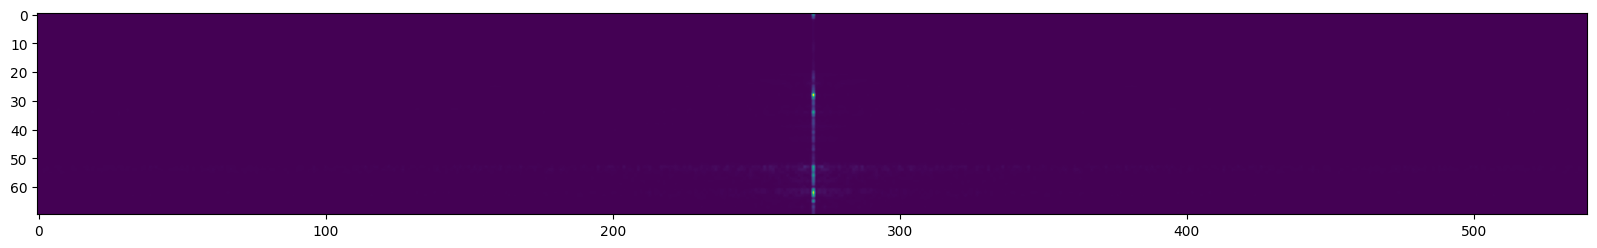

In [21]:
range_doppler = np.fft.fft(lst, axis=0)
range_doppler = np.fft.fftshift(range_doppler, axes=0)
plt.imshow(np.abs(range_doppler).T)

In [22]:
c = 3e8 # Speed of light (m/s)
sample_rate = 2924/30 # Rate at which the radar samples from ADC (ksps - kilosamples per second)
freq_slope = 5.711 # Frequency slope of the chirp (MHz/us)
adc_samples = 512 # Number of samples from a single chirp

start_freq = 77 # Starting frequency of the chirp (GHz)
idle_time = 1000 # Time before starting next chirp (us)
ramp_end_time = 182.52 # Time after sending each chirp (us)
num_chirps = len(lst) # Number of chirps per frame
num_tx = 2 # Number of transmitters

# Range resolution
range_res = (c * sample_rate * 1e3) / (2 * freq_slope * 1e12 * adc_samples)
print(f'Range Resolution: {range_res} [meters/second]')

# Apply the range resolution factor to the range indices
ranges = np.arange(adc_samples) * range_res

Range Resolution: 0.004999945281036596 [meters/second]


Velocity Resolution: 0.0015253457055709873 [meters/second]


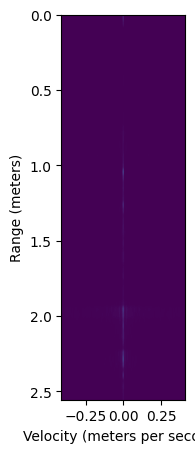

In [23]:
velocity_res = c / (2 * start_freq * 1e9 * (idle_time + ramp_end_time) * 1e-6 * num_chirps * num_tx)
print(f'Velocity Resolution: {velocity_res} [meters/second]')

# Apply the velocity resolution factor to the doppler indicies
velocities = np.arange(num_chirps) - (num_chirps // 2)
velocities = velocities * velocity_res

powers = np.abs(range_doppler)

# Plot with units
plt.imshow(powers.T, extent=[velocities.min(), velocities.max(), ranges.max(), ranges.min()])
plt.xlabel('Velocity (meters per second)')
plt.ylabel('Range (meters)')
plt.show()

# plt.plot(velocities, powers)
# plt.xlabel('Velocity (meters per second)')
# plt.ylabel('Reflected Power')
# plt.title('Interpreting a Single Frame - Doppler')
# plt.show()

## doppler dla chodzenia

In [24]:
frames = loaded_file['8']['dataset_8']

In [25]:
chodzenie_real= []
chodzenie_imag= []
for i in range(len(frames)):
    yf = frames[i,0,0,:]
    yf = _chunk_to_fft(yf)
    chodzenie_real.append(2.0/N * np.abs(yf.real[0:N//2])[:70])
    chodzenie_imag.append(2.0/N * np.abs(yf.imag[0:N//2])[:70])

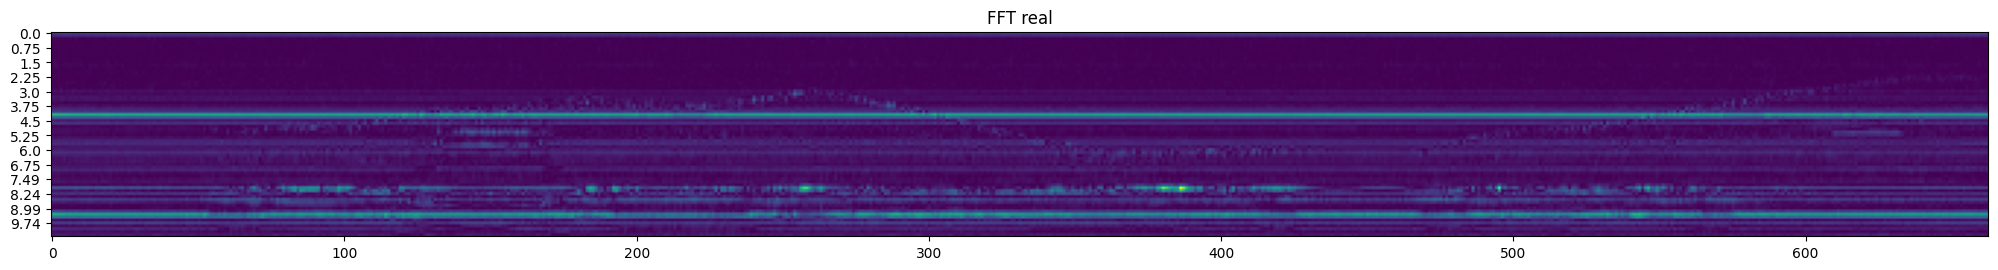

In [26]:
skip = 30 # co którą klatkę fft wyświetlć
plt.figure(figsize=(25,5))
plt.imshow(np.array(chodzenie_real).T[:,::skip])
plt.title('FFT real')
plt.yticks(np.arange(start=0,stop=70,step=5), xf_scaled[:70][::5])
# plt.colorbar()
plt.show()

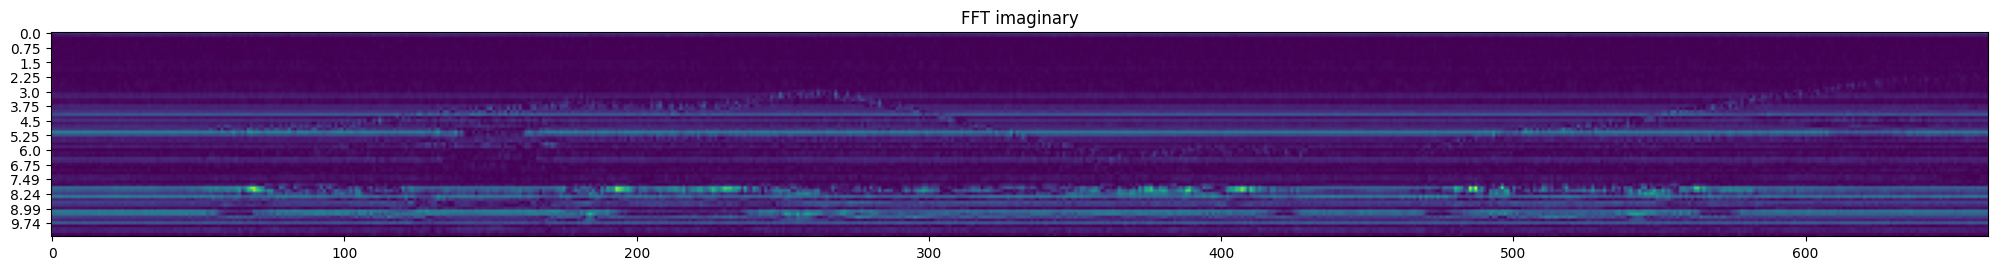

In [27]:
skip = 30 # co którą klatkę fft wyświetlć
plt.figure(figsize=(25,5))
plt.title('FFT imaginary')
plt.imshow(np.array(chodzenie_imag).T[:,::skip])
plt.yticks(np.arange(start=0,stop=70,step=5), xf_scaled[:70][::5])
# plt.colorbar()
plt.show()

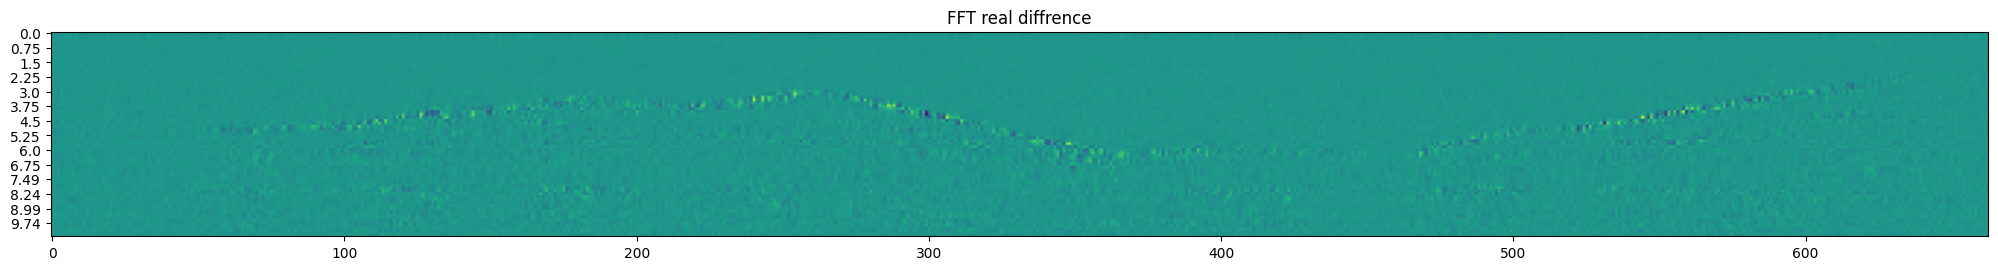

In [33]:
chodzenie_real_diff = np.zeros_like(chodzenie_real)
for i, frame in enumerate(chodzenie_real):
    if i != 0:
        chodzenie_real_diff[i] = frame - chodzenie_real[i-1]

skip = 30 # co którą klatkę fft wyświetlć
plt.figure(figsize=(25,5))
plt.title('FFT real diffrence')
plt.imshow(np.array(chodzenie_real_diff).T[:,::skip])
plt.yticks(np.arange(start=0,stop=70,step=5), xf_scaled[:70][::5])
# plt.colorbar()
plt.show()

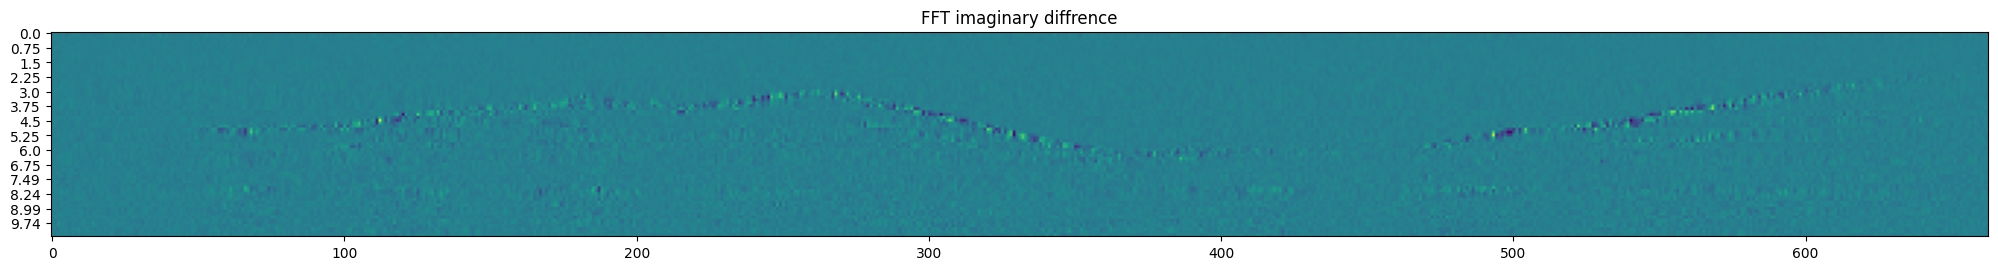

In [34]:
chodzenie_imag_diff = np.zeros_like(chodzenie_imag)
for i, frame in enumerate(chodzenie_imag):
    if i != 0:
        chodzenie_imag_diff[i] = frame - chodzenie_imag[i-1]

skip = 30 # co którą klatkę fft wyświetlć
plt.figure(figsize=(25,5))
plt.title('FFT imaginary diffrence')
plt.imshow(np.array(chodzenie_imag_diff).T[:,::skip])
plt.yticks(np.arange(start=0,stop=70,step=5), xf_scaled[:70][::5])
# plt.colorbar()
plt.show()

In [35]:
range_doppler = np.fft.fft(chodzenie_real, axis=0)
range_doppler = np.fft.fftshift(range_doppler, axes=0)


In [36]:
c = 3e8 # Speed of light (m/s)
sample_rate = 2924 # Rate at which the radar samples from ADC (ksps - kilosamples per second)
freq_slope = 5.711 # Frequency slope of the chirp (MHz/us)(GHZ)
adc_samples = 512 # Number of samples from a single chirp

start_freq = 77 # Starting frequency of the chirp (GHz)
idle_time = 1000 # Time before starting next chirp (us)
ramp_end_time = 182.52 # Time after sending each chirp (us)
num_chirps = len(chodzenie_imag) # Number of chirps per frame
num_tx = 1 # Number of transmitters

# Range resolution
range_res = (c * sample_rate * 1e3) / (2 * freq_slope * 1e12 * adc_samples)
print(f'Range Resolution: {range_res} [meters/second]')

# Apply the range resolution factor to the range indices
ranges = np.arange(adc_samples) * range_res

Range Resolution: 0.14999835843109788 [meters/second]


Velocity Resolution: 8.284919342268488e-05 [meters/second]


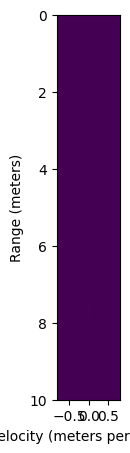

In [37]:
velocity_res = c / (2 * start_freq * 1e9 * (idle_time + ramp_end_time) * 1e-6 * num_chirps * num_tx)
print(f'Velocity Resolution: {velocity_res} [meters/second]')

# Apply the velocity resolution factor to the doppler indicies
velocities = np.arange(num_chirps) - (num_chirps // 2)
velocities = velocities * velocity_res

powers = np.abs(range_doppler)

# Plot with units
plt.imshow(powers.T, extent=[velocities.min(), velocities.max(), 10, ranges.min()])
plt.xlabel('Velocity (meters per second)')
plt.ylabel('Range (meters)')
plt.show()

In [38]:
loaded_file.close()